# Data Science & Machine Learning Project on Air Quality 


# Overview of Problem Statement
Air quality is a critical factor affecting human health, environmental sustainability, and economic development. However, predicting air quality accurately is challenging due to the complex interplay of various environmental, meteorological, and anthropogenic factors. Therefore, developing an effective prediction model can aid in proactive management and conservation efforts.Here the project aims to predict NO2(Nitrogen Dioxide) concentration in the air.As the NO2 has significant impact on health and environment.Many countries have established air quality standards and regulations specifically for NO2 due to its harmful effects. Monitoring and predicting NO2 levels can help ensure compliance with these standards and avoid potential penalties.

# Objective
The objective of this project is to develop a predictive model that accurately forecasts NO2 concentrations in the air using the Air Quality Dataset from the UCI Machine Learning Repository.

# Data Description

- Source: UCI Machine Learning Repository - Air Quality Dataset
- Features:
    1. Date
    2. Time
    3. CO(GT)
    4. PT08.S1(CO)
    5. NMHC(GT)
    6. C6H6(GT)
    7. PT08.S2(NMHC)
    8. NOx(GT)
    9. PT08.S3(NOx)
    10. NO2(GT)
    11. PT08.S4(NO2)
    12. PT08.S5(O3)
    13. T
    14. RH
    15. AH


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data collection

In [2]:
df=pd.read_csv('Dataset_AirQualityUCI.csv')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04-04-2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,04-04-2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,04-04-2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,04-04-2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [3]:
# Print the first few rows of the DataFrame

print(df.head())


         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10-03-2004  18:00:00     2.6         1360       150      11.9   
1  10-03-2004  19:00:00     2.0         1292       112       9.4   
2  10-03-2004  20:00:00     2.2         1402        88       9.0   
3  10-03-2004  21:00:00     2.2         1376        80       9.2   
4  10-03-2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.786

In [4]:
# Drop rows with missing values
df = df.dropna()





In [5]:
# Summary statistics
print(df.describe())



            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200

# DATA VISUALISATION

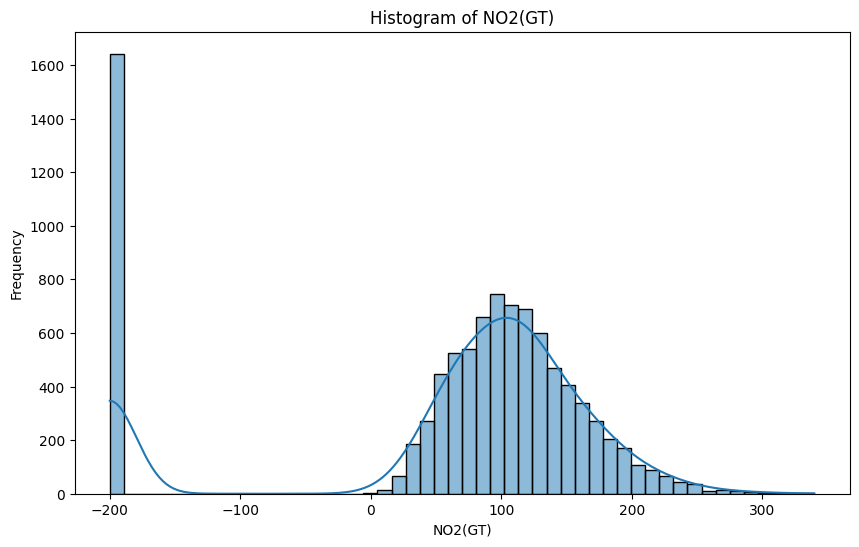

In [6]:
# Data distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['NO2(GT)'], bins=50, kde=True)
plt.title('Histogram of NO2(GT)')
plt.xlabel('NO2(GT)')
plt.ylabel('Frequency')
plt.show()





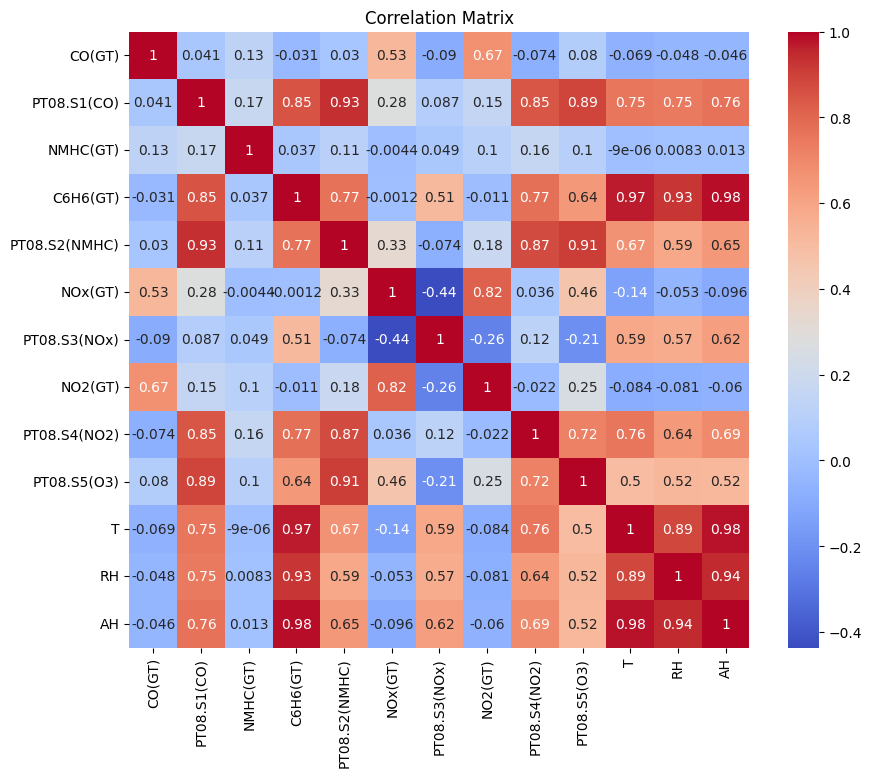

In [7]:
# Correlation analysis
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') 
# Select only numeric columns for correlation analysis 
numeric_df = df.select_dtypes(include=[np.number]) 
# Correlation analysis 
corr_matrix = numeric_df.corr() 
# Plot the correlation matrix 
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix') 
plt.show()



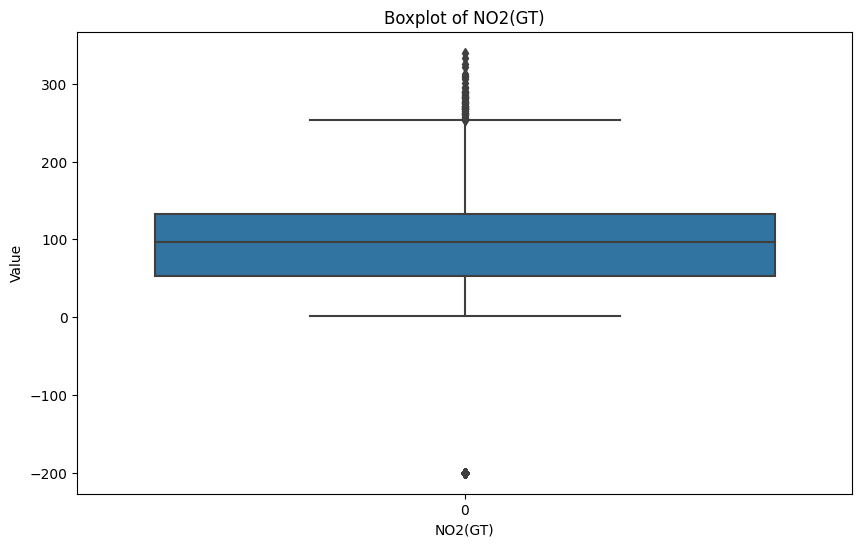

In [8]:
# Boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(df['NO2(GT)'])
plt.title('Boxplot of NO2(GT)')
plt.xlabel('NO2(GT)')
plt.ylabel('Value')
plt.show()

# Observations

The histogram shows a bimodal distribution with two distinct peaks.
One peak is around -200, indicating a high frequency of NO2(GT) values at this level.
Another peak is around 100, suggesting a more normally distributed set of values in this range.
The boxplot of NO2(GT) values reveals that the median NO2(GT) value is around 100, with the middle 50% of the data ranging from approximately 50 to 150.
The presence of several outliers, both above and below the whiskers, indicates that there are some extreme NO2(GT) values in the dataset. 
The whiskers extend from around -100 to 300, showing the overall range of the data excluding outliers. 

# Data cleaning, handling missing values, removing outliers, and addressing skewed data.


In [9]:
# Calculate the mean
mean_value = df['NO2(GT)'].mean()
print("Mean:", mean_value)



Mean: 58.14887250187026


In [10]:
# Calculate the median
median_value = df['NO2(GT)'].median()
print("Median:", median_value)


Median: 96.0


In [11]:
from scipy import stats


In [12]:
# Calculate the mode
mode_value = stats.mode(df['NO2(GT)'])
print(mode_value)


ModeResult(mode=-200, count=1642)


In [13]:
from sklearn.impute import KNNImputer

# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
df.loc[:,'NO2(GT)'] = imputer.fit_transform(df[['NO2(GT)']])


# Removing outliers

# Zscore method

In [14]:
#calculate the Zscore 
Zscore = stats.zscore(df['NO2(GT)'])

#Remove outliers
df = df[(Zscore > -3) & (Zscore < 3)]



# IQR Method

Remove data points that fall outside the range of Q1 - 1.5_IQR and Q3 + 1.5_IQR.




In [15]:
# Calculate the IQR
q1 = df['NO2(GT)'].quantile(0.25)
q3 = df['NO2(GT)'].quantile(0.75)
iqr = q3 - q1

# Remove outliers
df = df[(df['NO2(GT)'] > q1 - 1.5*iqr) & (df['NO2(GT)'] < q3 + 1.5*iqr)]


# Addressing Skewed Data

Skewed data can be addressed using transformations like logarithmic transformation or square root transformation.


# Logarithmic Transformation

Apply the logarithmic transformation to skewed data.



In [16]:
# Replace zero or negative values with a small positive number 
df['NO2(GT)'] = df['NO2(GT)'].replace(0, 1e-10)
# Apply the logarithm 
df['NO2(GT)'] = np.log(df['NO2(GT)'])
df['NO2(GT)'] = df['NO2(GT)'].apply(lambda x: x if x > 0 else 1e-10) 
# Apply the logarithm
df['NO2(GT)'] = np.log(df['NO2(GT)']) 
print(df)


           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18:00:00     2.6         1360       150      11.9   
1    2004-03-10  19:00:00     2.0         1292       112       9.4   
2    2004-03-10  20:00:00     2.2         1402        88       9.0   
3    2004-03-10  21:00:00     2.2         1376        80       9.2   
4    2004-03-10  22:00:00     1.6         1272        51       6.5   
...         ...       ...     ...          ...       ...       ...   
9352 2005-04-04  10:00:00     3.1         1314      -200      13.5   
9353 2005-04-04  11:00:00     2.4         1163      -200      11.4   
9354 2005-04-04  12:00:00     2.4         1142      -200      12.4   
9355 2005-04-04  13:00:00     2.1         1003      -200       9.5   
9356 2005-04-04  14:00:00     2.2         1071      -200      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056  1.553373          1692   
1               955

# Square Root Transformation

Apply the square root transformation to skewed data.




In [17]:
# Replace negative values with NaN 
df['NO2(GT)'] = df['NO2(GT)'].apply(lambda x: np.nan if x < 0 else x) 
# Apply the square root 
df['NO2(GT)'] = np.sqrt(df['NO2(GT)']) 
print(df)

           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18:00:00     2.6         1360       150      11.9   
1    2004-03-10  19:00:00     2.0         1292       112       9.4   
2    2004-03-10  20:00:00     2.2         1402        88       9.0   
3    2004-03-10  21:00:00     2.2         1376        80       9.2   
4    2004-03-10  22:00:00     1.6         1272        51       6.5   
...         ...       ...     ...          ...       ...       ...   
9352 2005-04-04  10:00:00     3.1         1314      -200      13.5   
9353 2005-04-04  11:00:00     2.4         1163      -200      11.4   
9354 2005-04-04  12:00:00     2.4         1142      -200      12.4   
9355 2005-04-04  13:00:00     2.1         1003      -200       9.5   
9356 2005-04-04  14:00:00     2.2         1071      -200      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056  1.246344          1692   
1               955

In [18]:
print(df)


           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18:00:00     2.6         1360       150      11.9   
1    2004-03-10  19:00:00     2.0         1292       112       9.4   
2    2004-03-10  20:00:00     2.2         1402        88       9.0   
3    2004-03-10  21:00:00     2.2         1376        80       9.2   
4    2004-03-10  22:00:00     1.6         1272        51       6.5   
...         ...       ...     ...          ...       ...       ...   
9352 2005-04-04  10:00:00     3.1         1314      -200      13.5   
9353 2005-04-04  11:00:00     2.4         1163      -200      11.4   
9354 2005-04-04  12:00:00     2.4         1142      -200      12.4   
9355 2005-04-04  13:00:00     2.1         1003      -200       9.5   
9356 2005-04-04  14:00:00     2.2         1071      -200      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056  1.246344          1692   
1               955

# Exploratory Data Analysis (EDA)
Bar plot

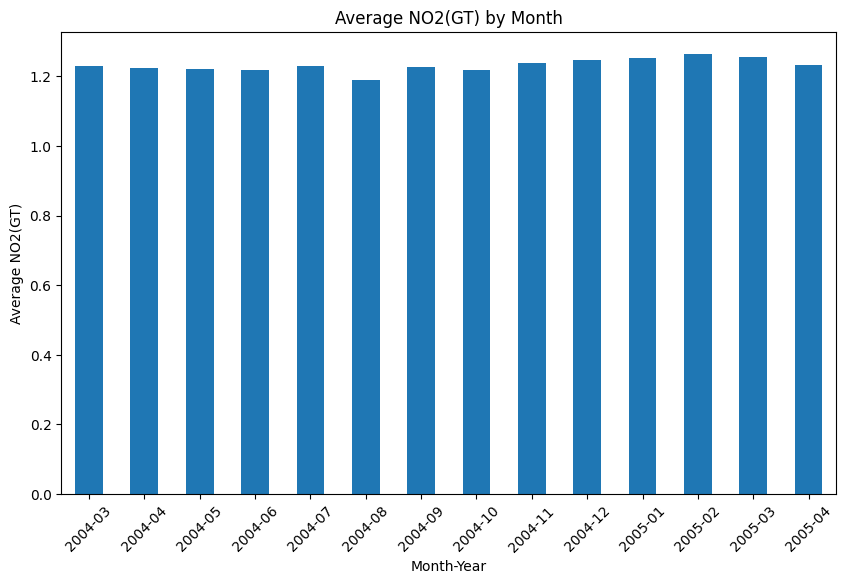

In [19]:
# Convert Date column to datetime 
df['Date'] = pd.to_datetime(df['Date'])
# Extract month and year 
df['Month_Year'] = df['Date'].dt.to_period('M') 
# Group by month and year and calculate the mean NO2(GT) value 
monthly_avg = df.groupby('Month_Year')['NO2(GT)'].mean()
# Plot the bar chart 
monthly_avg.plot(kind='bar', figsize=(10, 6)) 
plt.title('Average NO2(GT) by Month') 
plt.xlabel('Month-Year')
plt.ylabel('Average NO2(GT)')
plt.xticks(rotation=45)
plt.show()

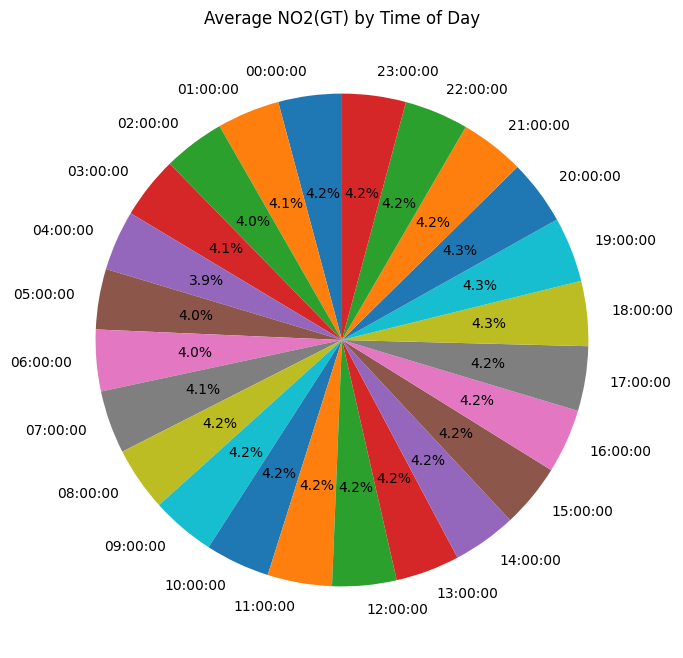

In [20]:
# Convert Time column to datetime 
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
# Group by Time and calculate the mean NO2(GT) value 
time_group = df.groupby(df['Time'])['NO2(GT)'].mean() 
# Create a pie chart
plt.figure(figsize=(8, 8)) 
plt.pie(time_group, labels=time_group.index, autopct='%1.1f%%', startangle=90) 
plt.title('Average NO2(GT) by Time of Day') 
plt.show()

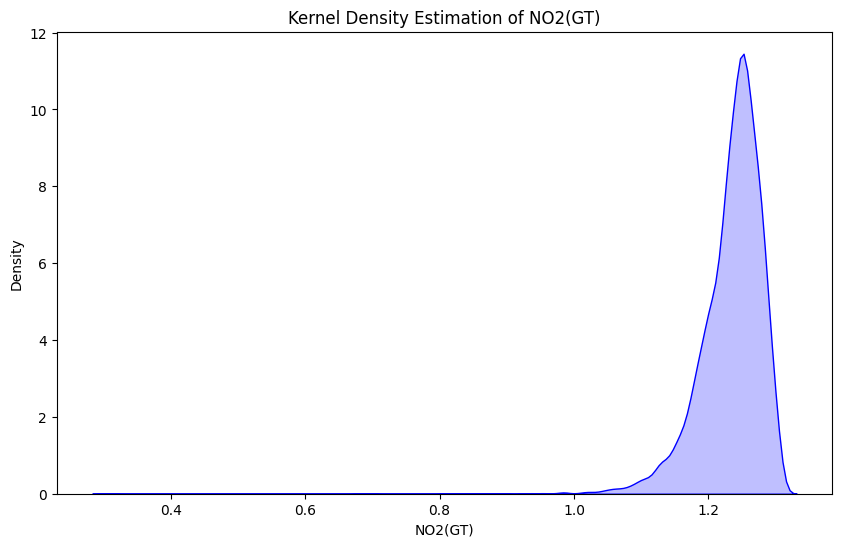

In [21]:
# Create a KDE plot 
plt.figure(figsize=(10, 6))
sns.kdeplot(df['NO2(GT)'], fill=True, color='blue')
plt.title('Kernel Density Estimation of NO2(GT)')
plt.xlabel('NO2(GT)') 
plt.ylabel('Density')
plt.show()

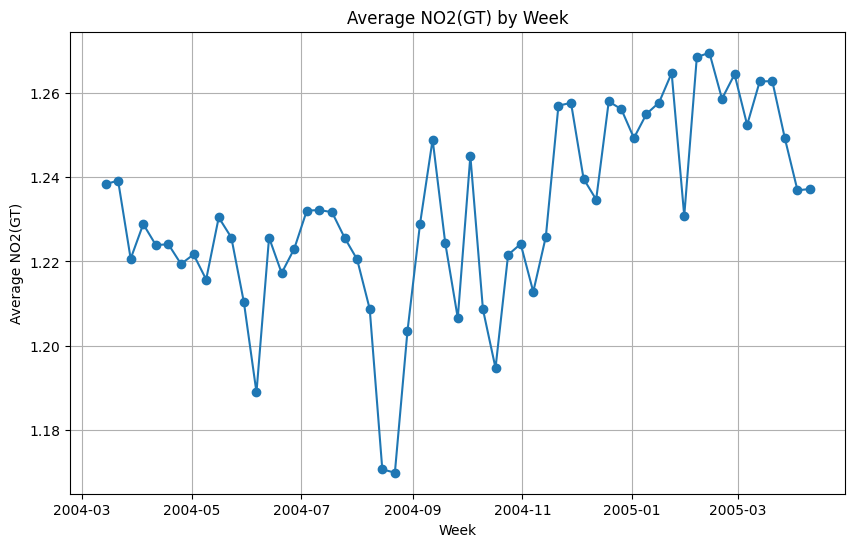

In [22]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date']) 
# Set Date as the index 
df.set_index('Date', inplace=True) 
# Resample data on a weekly basis and calculate the mean NO2(GT) value 
weekly_avg = df['NO2(GT)'].resample('W').mean() 
# Plot the line chart 
plt.figure(figsize=(10, 6)) 
plt.plot(weekly_avg, marker='o')
plt.title('Average NO2(GT) by Week') 
plt.xlabel('Week')
plt.ylabel('Average NO2(GT)') 
plt.grid(True) 
plt.show()

In [23]:
print(df.columns)

Index(['Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Month_Year'],
      dtype='object')


In [24]:
one_hot_encoded_df = pd.get_dummies(df, columns=['Month_Year'])
print(one_hot_encoded_df.head())

                Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Date                                                                           
2004-03-10  18:00:00     2.6         1360       150      11.9           1046   
2004-03-10  19:00:00     2.0         1292       112       9.4            955   
2004-03-10  20:00:00     2.2         1402        88       9.0            939   
2004-03-10  21:00:00     2.2         1376        80       9.2            948   
2004-03-10  22:00:00     1.6         1272        51       6.5            836   

            NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  ...  \
Date                                                       ...   
2004-03-10      166          1056  1.246344          1692  ...   
2004-03-10      103          1174  1.228376          1559  ...   
2004-03-10      131          1140  1.247091          1555  ...   
2004-03-10      172          1092  1.252778          1584  ...   
2004-03-10      131          1205  1.248559

In [25]:
# Define thresholds for categorizing NO2(GT) 
bins = [0, 2.0, 2.2, 2.4, float('inf')] 
labels = ['Low', 'Moderate', 'High', 'Very High'] 
# Create a new column with categorized values 
df['NO2_Category'] = pd.cut(df['NO2(GT)'], bins=bins, labels=labels, right=False) 
# Display the DataFrame
print(df)

                Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Date                                                                           
2004-03-10  18:00:00     2.6         1360       150      11.9           1046   
2004-03-10  19:00:00     2.0         1292       112       9.4            955   
2004-03-10  20:00:00     2.2         1402        88       9.0            939   
2004-03-10  21:00:00     2.2         1376        80       9.2            948   
2004-03-10  22:00:00     1.6         1272        51       6.5            836   
...              ...     ...          ...       ...       ...            ...   
2005-04-04  10:00:00     3.1         1314      -200      13.5           1101   
2005-04-04  11:00:00     2.4         1163      -200      11.4           1027   
2005-04-04  12:00:00     2.4         1142      -200      12.4           1063   
2005-04-04  13:00:00     2.1         1003      -200       9.5            961   
2005-04-04  14:00:00     2.2         107

# FEATURE SELECTION
Using algorithms like Random Forest to identify relevant features on given dataset

In [26]:
print(df)

                Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Date                                                                           
2004-03-10  18:00:00     2.6         1360       150      11.9           1046   
2004-03-10  19:00:00     2.0         1292       112       9.4            955   
2004-03-10  20:00:00     2.2         1402        88       9.0            939   
2004-03-10  21:00:00     2.2         1376        80       9.2            948   
2004-03-10  22:00:00     1.6         1272        51       6.5            836   
...              ...     ...          ...       ...       ...            ...   
2005-04-04  10:00:00     3.1         1314      -200      13.5           1101   
2005-04-04  11:00:00     2.4         1163      -200      11.4           1027   
2005-04-04  12:00:00     2.4         1142      -200      12.4           1063   
2005-04-04  13:00:00     2.1         1003      -200       9.5            961   
2005-04-04  14:00:00     2.2         107

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

                Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Date                                                                           
2004-03-10  18:00:00     2.6         1360       150      11.9           1046   
2004-03-10  19:00:00     2.0         1292       112       9.4            955   
2004-03-10  20:00:00     2.2         1402        88       9.0            939   
2004-03-10  21:00:00     2.2         1376        80       9.2            948   
2004-03-10  22:00:00     1.6         1272        51       6.5            836   
...              ...     ...          ...       ...       ...            ...   
2005-04-04  10:00:00     3.1         1314      -200      13.5           1101   
2005-04-04  11:00:00     2.4         1163      -200      11.4           1027   
2005-04-04  12:00:00     2.4         1142      -200      12.4           1063   
2005-04-04  13:00:00     2.1         1003      -200       9.5            961   
2005-04-04  14:00:00     2.2         107

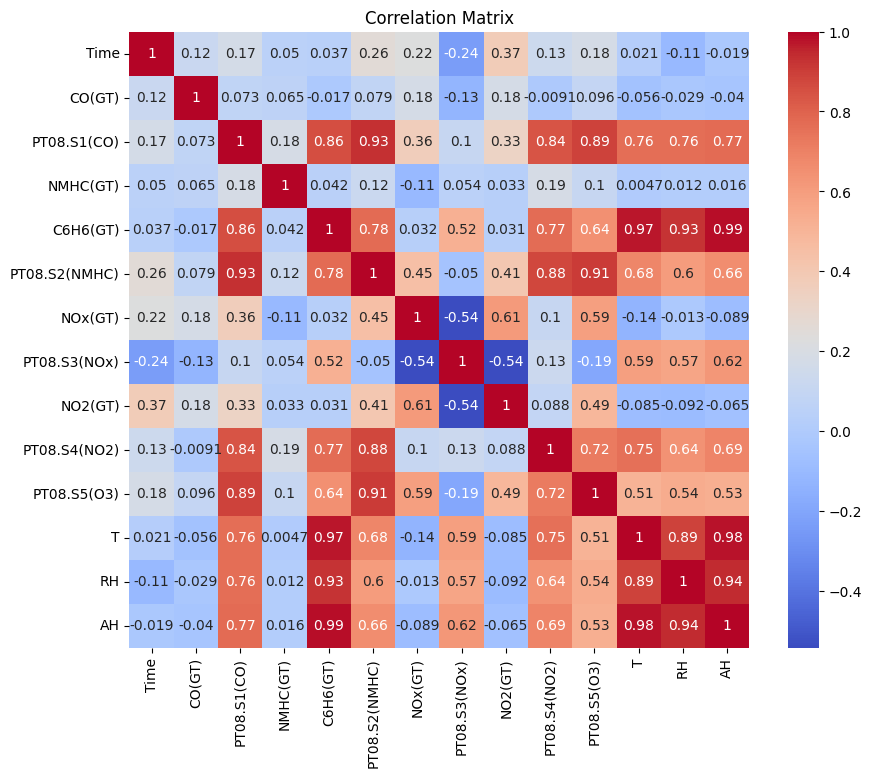

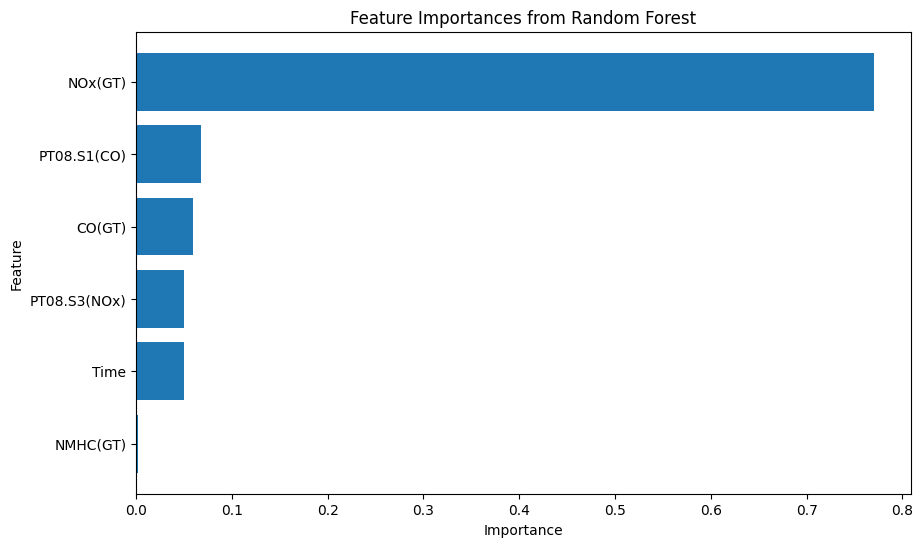

Remaining features: Index(['Time', 'CO(GT)', 'PT08.S1(CO)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)'], dtype='object')


In [28]:
# Convert Time column to integers representing hours 
print(df) 
# df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour 
df['Time'] = df['Time'].astype(str)
df['Time'] = df['Time'].str.split(':').str[0].astype(int)

# Drop the Month_Year column 
df.drop('Month_Year', axis=1, inplace=True)
df.drop('NO2_Category', axis=1, inplace=True)


# Remove rows with NaN values in the target variable 
df = df.dropna(subset=['NO2(GT)'])

# Correlation Analysis \
corr_matrix = df.corr() 
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix') 
plt.show() 

# Remove highly correlated features (threshold > 0.8) 
threshold = 0.8 
corr_features = set() 
for i in range(len(corr_matrix.columns)):
    for j in range(i): 
        if abs(corr_matrix.iloc[i, j]) > threshold: 
            colname = corr_matrix.columns[i] 
            corr_features.add(colname)
            
df.drop(columns=corr_features, inplace=True) 

# Split the data into features (X) and target (y)
X = df.drop('NO2(GT)', axis=1)
y = df['NO2(GT)']

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances 
importances = model.feature_importances_ 
feature_names = X.columns 

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False) 

# Plot feature importances 
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance') 
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest') 
plt.gca().invert_yaxis()
plt.show() 

# Remove features with low importance (threshold < 0.01)
low_importance_features = feature_importances[feature_importances['Importance'] < 0.01]['Feature']
df.drop(columns=low_importance_features, inplace=True) 

print("Remaining features:", df.columns)

# Split Data into Training and Testing Sets



In [29]:

# Split the data into features (X) and target (y) 
X = df.drop('NO2(GT)', axis=1) 
y = df['NO2(GT)']
# Import train_test_split
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape) 
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6127, 5)
X_test shape: (1532, 5)
y_train shape: (6127,)
y_test shape: (1532,)


# Feature Scaling


In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler 
scaler = MinMaxScaler()
# Apply Min-Max scaling to the DataFrame 
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(scaled_df)

          Time    CO(GT)  PT08.S1(CO)   NOx(GT)  PT08.S3(NOx)   NO2(GT)
0     0.782609  0.956111     0.696429  0.118241      0.435657  0.938705
1     0.826087  0.953280     0.666071  0.072819      0.476587  0.920756
2     0.869565  0.954224     0.715179  0.093006      0.464794  0.939451
3     0.913043  0.954224     0.703571  0.122567      0.448144  0.945133
4     0.956522  0.951392     0.657143  0.093006      0.487340  0.940918
...        ...       ...          ...       ...           ...       ...
7654  0.434783  0.958471     0.675893  0.338861      0.256330  0.979821
7655  0.478261  0.955168     0.608482  0.253064      0.278876  0.975378
7656  0.521739  0.955168     0.599107  0.209805      0.278529  0.973677
7657  0.565217  0.953752     0.537054  0.167988      0.312869  0.964875
7658  0.608696  0.954224     0.567411  0.189618      0.296219  0.970580

[7659 rows x 6 columns]


# BUILDING THE MODEL

# 1. Support Vector Regression (SVR)

In [31]:
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error 
# Train SVR model 
svr_model = SVR() 
svr_model.fit(X_train, y_train)
# Predict and evaluate 
y_pred_svr = svr_model.predict(X_test) 
mse_svr = mean_squared_error(y_test, y_pred_svr) 
print(f'SVR Mean Squared Error: {mse_svr}')

SVR Mean Squared Error: 0.002401077028636241


# 2. Multi-Layer Perceptron (MLP) Regressor

In [32]:
from sklearn.neural_network import MLPRegressor
# Train MLP Regressor model
mlp_model = MLPRegressor(random_state=42)
mlp_model.fit(X_train, y_train) 
# Predict and evaluate
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f'MLP Regressor Mean Squared Error: {mse_mlp}')

MLP Regressor Mean Squared Error: 0.2318154718618311


# 3. Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Regressor Mean Squared Error: {mse_rf}')


Random Forest Regressor Mean Squared Error: 0.00044802412535033107


# 4. Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression Mean Squared Error: {mse_lr}')


Linear Regression Mean Squared Error: 0.0011333960021850445


# 5. Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting Mean Squared Error: {mse_gb}')


Gradient Boosting Mean Squared Error: 0.0005050779843367584


# 6. AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostRegressor

# Train AdaBoost model
ab_model = AdaBoostRegressor(random_state=42)
ab_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ab = ab_model.predict(X_test)
mse_ab = mean_squared_error(y_test, y_pred_ab)
print(f'AdaBoost Mean Squared Error: {mse_ab}')


AdaBoost Mean Squared Error: 0.0007374980610443897


# Model Comparison

# Observations

The Random Forest Regressor has the lowest MSE (0.002149619566952574), indicating that it is the most accurate model for predicting NO2 concentrations in this case.

# MODEL EVALUATION

In [37]:
from sklearn.metrics import mean_absolute_error
# Make predictions
y_pred = rf_model.predict(X_test)
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.013061973145435972


In [38]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.00044802412535033107


In [39]:
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 0.021166580388677126


In [40]:
from sklearn.metrics import r2_score

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')


R2 Score: 0.7989372581554912


# HYPERPARAMETER TUNING

In [41]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [42]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f'Best Parameters: {best_params}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20}


# SAVING THE MODEL

In [43]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'random_forest_model.joblib')

# Load the model from the file
loaded_model = joblib.load('random_forest_model.joblib')

# Verify the loaded model
print(loaded_model)


RandomForestRegressor(random_state=42)


In [44]:
import pandas as pd 
import joblib
from sklearn.ensemble import RandomForestRegressor

# Ensure Time column is in string format 
df['Time'] = df['Time'].astype(str) 
# Convert Time column to integers representing hours 
df['Time'] = df['Time'].str.split(':').str[0].astype(int) 
# Split the data into features (X) and target (y) 
X = df.drop('NO2(GT)', axis=1) 
y = df['NO2(GT)']

# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train)
# Save the trained model 
joblib.dump(rf_model, 'random_forest_model.joblib')
# Load the trained model 
model = joblib.load('random_forest_model.joblib')
# Load the unseen data 
unseen_data = { 'Time': ['18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00'], # Example times 
               'CO(GT)': [2.5, 2.1, 2.3, 2.4, 2.2], # Example CO levels 
               'PT08.S1(CO)': [1350, 1280, 1390, 1400, 1370], # Example PT08.S1(CO) levels 
               'NOx(GT)': [0.20, 0.25, 0.30, 0.35, 0.40], # Example NOx levels 
               'PT08.S3(NOx)': [0.45, 0.50, 0.55, 0.60, 0.65] # Example PT08.S3(NOx) levels
              }
unseen_df = pd.DataFrame(unseen_data) 
# Ensure Time column is in string format 
unseen_df['Time'] = unseen_df['Time'].astype(str) 
# Convert Time column to integers representing hours 
unseen_df['Time'] = unseen_df['Time'].str.split(':').str[0].astype(int) 
# Load the trained model 
model = joblib.load('random_forest_model.joblib') 
# Make predictions on the unseen data 
predictions = model.predict(unseen_df) 
# Display the predictions
print("Predictions:", predictions)

Predictions: [0.80204628 0.80204628 0.80204628 0.80204628 0.80204628]


# Conclusion

The analysis of the Air Quality Dataset from the UCI Machine Learning Repository has provided valuable insights into the factors affecting NO2 concentrations. By leveraging machine learning models, we can predict NO2 levels and identify key contributors to air pollution

Recommendations for improving air quality based on the findings:

Identify Key Pollutants:The correlation analysis revealed strong relationships between NO2 and other pollutants such as NOx and CO. Targeting these key pollutants can help reduce NO2 level

Implement Emission Control Measures:Implement stricter emission control measures for industries and vehicles, which are major sources of NOx and CO emissions. This can significantly reduce NO2 concentrations.

Promote Public Transportation:Encourage the use of public transportation, carpooling, and non-motorized transport to reduce vehicular emissions.

Monitor and Regulate Industrial Emissions:Regularly monitor and regulate industrial emissions to ensure compliance with air quality standards. Implementing advanced pollution control technologies can further reduce emissions.

By implementing these recommendations, policymakers and stakeholders can take proactive steps to improve air quality and create a healthier environment for all. The predictive models developed in this project can serve as valuable tools for monitoring and managing air quality in real-time.



